In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
# 1. Load and Preprocess CIFAR-10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values to be between 0 and 1
X_train, X_test = X_train / 255.0, X_test / 255.0

# Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

Training data shape: (50000, 32, 32, 3)
Test data shape: (10000, 32, 32, 3)


In [3]:
# 2. Build CNN Architecture
model = models.Sequential([
    # Convolutional Block 1
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Block 2
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    # Convolutional Block 3
    layers.Conv2D(64, (3, 3), activation='relu'),
    
    # Dense Layers
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax') # 10 output classes
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 1024)              0

In [4]:
# 3. Train Model
history = model.fit(X_train, y_train, epochs=15, 
                    validation_data=(X_test, y_test))

model.save('models/cnn_model.h5')

Epoch 1/15
1563/1563 [==============================] - 133s 78ms/step - loss: 1.5285 - accuracy: 0.4382 - val_loss: 1.2628 - val_accuracy: 0.5504
Epoch 2/15
1563/1563 [==============================] - 116s 74ms/step - loss: 1.1717 - accuracy: 0.5833 - val_loss: 1.1194 - val_accuracy: 0.6041
Epoch 3/15
1563/1563 [==============================] - 112s 72ms/step - loss: 1.0193 - accuracy: 0.6406 - val_loss: 0.9936 - val_accuracy: 0.6532
Epoch 4/15
1563/1563 [==============================] - 115s 74ms/step - loss: 0.9197 - accuracy: 0.6752 - val_loss: 0.9295 - val_accuracy: 0.6761
Epoch 5/15
1563/1563 [==============================] - 114s 73ms/step - loss: 0.8529 - accuracy: 0.6992 - val_loss: 0.9102 - val_accuracy: 0.6916
Epoch 6/15
1563/1563 [==============================] - 118s 76ms/step - loss: 0.7986 - accuracy: 0.7214 - val_loss: 0.8915 - val_accuracy: 0.6910
Epoch 7/15
1563/1563 [==============================] - 115s 73ms/step - loss: 0.7489 - accuracy: 0.7375 - val_loss: 0

313/313 [==============================] - 9s 28ms/step

=== Detailed Classification Report ===
              precision    recall  f1-score   support

    airplane       0.71      0.78      0.75      1000
  automobile       0.86      0.76      0.81      1000
        bird       0.68      0.55      0.61      1000
         cat       0.48      0.59      0.53      1000
        deer       0.68      0.67      0.67      1000
         dog       0.60      0.63      0.61      1000
        frog       0.66      0.87      0.75      1000
       horse       0.82      0.67      0.74      1000
        ship       0.91      0.71      0.80      1000
       truck       0.78      0.80      0.79      1000

    accuracy                           0.70     10000
   macro avg       0.72      0.70      0.71     10000
weighted avg       0.72      0.70      0.71     10000



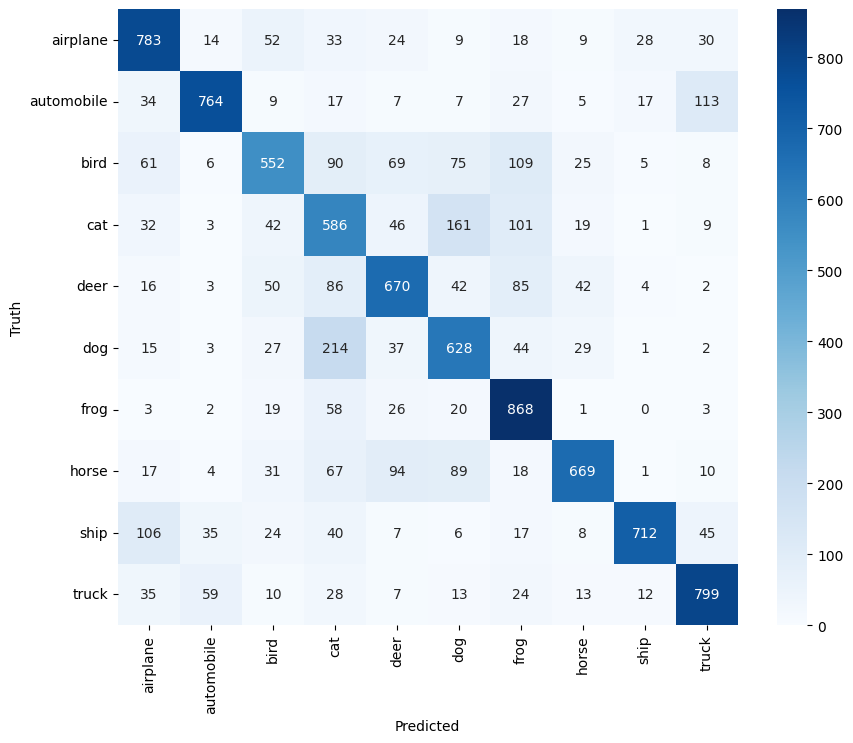

In [5]:
# 4. Evaluation (Precision, Recall, F1)
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("\n=== Detailed Classification Report ===")
# This calculates Precision, Recall, and F1-Score as requested
print(classification_report(y_test, y_pred, target_names=class_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

### Evaluation Metrics Explanation
* **Accuracy**: The overall percentage of correctly classified images.
* **Precision**: Out of all images predicted as "Dog", how many were actually dogs? (Useful when false positives are costly).
* **Recall**: Out of all actual "Dogs" in the dataset, how many did the model correctly find? (Useful when false negatives are costly).
* **F1-Score**: The harmonic mean of Precision and Recall. It provides a balanced view of the model's performance, especially if class distribution is uneven.
